**1. SETUP & CONFIGURATION**

In [15]:
# Core libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download NLTK data (run once)
nltk.download(['punkt', 'wordnet', 'stopwords', 'omw-1.4', 'punkt_tab'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
input_csv = "/content/drive/MyDrive/NLP_Project/dataset.csv"
output_csv = "/content/drive/MyDrive/NLP_Project/processed_data.csv"

**bold text**

In [18]:
# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punct_pattern = re.compile(f'[{re.escape(string.punctuation)}]')

# Contraction mapping
CONTRACTION_MAP = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot",
    "could've": "could have", "couldn't": "could not",
    "didn't": "did not", "doesn't": "does not", "don't": "do not",
    "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
    "he'd": "he would", "he'll": "he will", "he's": "he is",
    "how'd": "how did", "how'll": "how will", "how's": "how is",
    "i'd": "i would", "i'll": "i will", "i'm": "i am",
    "i've": "i have", "isn't": "is not", "it'd": "it would",
    "it'll": "it will", "it's": "it is", "let's": "let us",
    "ma'am": "madam", "might've": "might have", "mightn't": "might not",
    "must've": "must have", "mustn't": "must not", "needn't": "need not",
    "o'clock": "of the clock", "oughtn't": "ought not", "shan't": "shall not",
    "she'd": "she would", "she'll": "she will", "she's": "she is",
    "should've": "should have", "shouldn't": "should not",
    "that'd": "that would", "that's": "that is", "there'd": "there would",
    "there's": "there is", "they'd": "they would", "they'll": "they will",
    "they're": "they are", "they've": "they have", "wasn't": "was not",
    "we'd": "we would", "we're": "we are", "we've": "we have",
    "weren't": "were not", "what'll": "what will", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is",
    "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who's": "who is",
    "who've": "who have", "why's": "why is", "why've": "why have",
    "won't": "will not", "would've": "would have", "wouldn't": "would not",
    "you'd": "you would", "you'll": "you will", "you're": "you are",
    "you've": "you have", "'re": " are", "n't": " not"
}

def expand_contractions(text):
    text = str(text).lower()
    for contraction, expansion in CONTRACTION_MAP.items():
        text = text.replace(contraction, expansion)
    return text

def clean_text(text):
    text = expand_contractions(text)
    text = punct_pattern.sub(' ', text)
    tokens = [word for word in word_tokenize(text)
             if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

def process_text(text):
    return lemmatize_text(clean_text(text))

**Data Processing**

In [19]:
def process_dataset(input_path, output_path):
    # Load data
    df = pd.read_csv(input_path)

    # Process text columns
    df['PROCESSED_CONTENT'] = df['CONTENT'].apply(process_text)
    df['PROCESSED_SUMMARY'] = df['SUMMARY'].apply(process_text)

    # Save processed data
    df.to_csv(output_path, index=False)
    return df

**Data Visualization**

In [20]:
def plot_category_distribution(df):
    plt.figure(figsize=(10,6))
    ax = sns.countplot(data=df, x='CATEGORY',
                      order=df['CATEGORY'].value_counts().index)
    plt.title('Article Category Distribution')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x()+0.25, p.get_height()+2))
    plt.show()

def plot_wordclouds(df):
    for category in df['CATEGORY'].unique():
        text = ' '.join(df[df['CATEGORY'] == category]['PROCESSED_CONTENT'])
        wordcloud = WordCloud(width=800, height=400,
                            background_color='white').generate(text)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud)
        plt.title(f'Top Words in {category} Content', fontsize=15)
        plt.axis('off')
        plt.show()

**Excecusion**

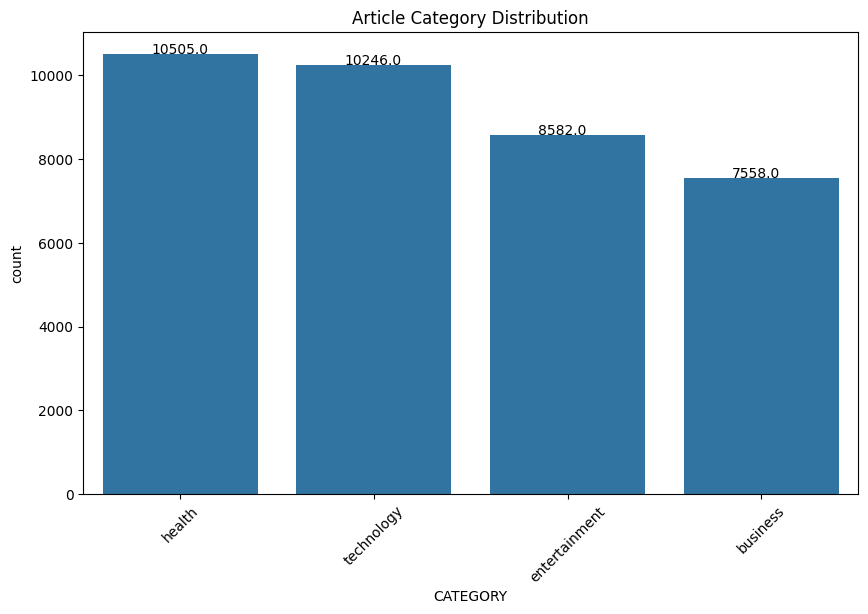

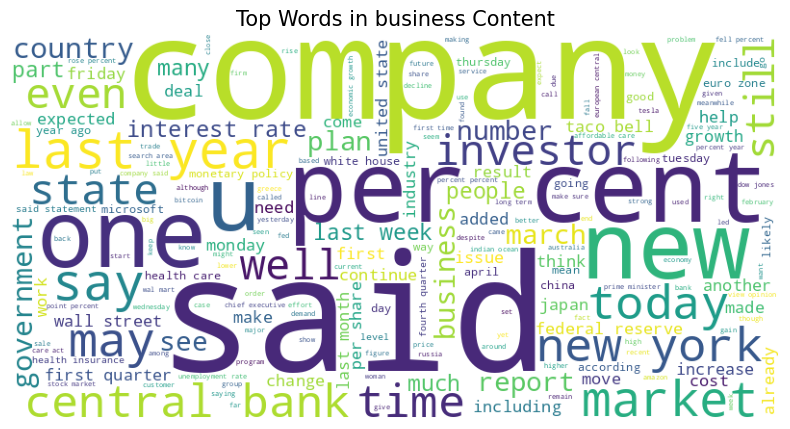

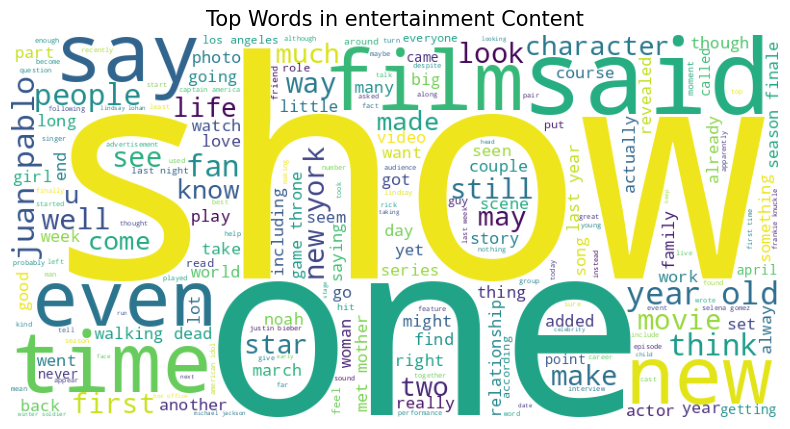

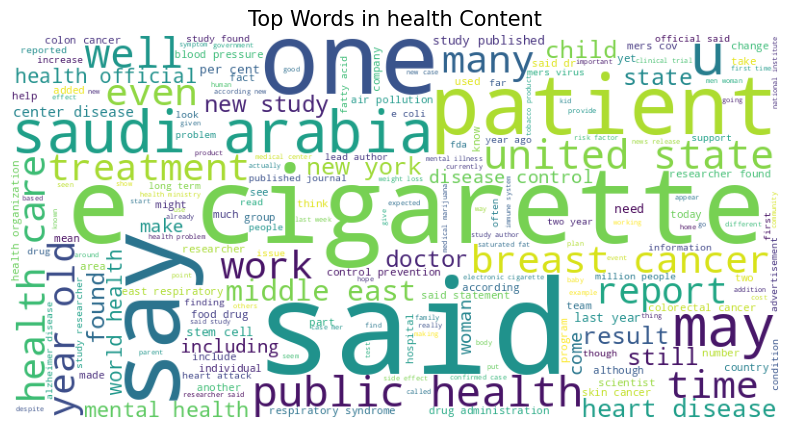

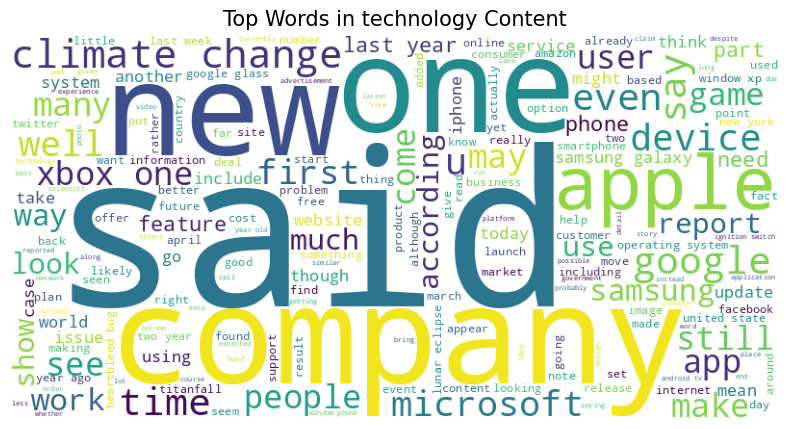

Processing complete! Output saved to /content/drive/MyDrive/NLP_Project/processed_data.csv


In [21]:
# Process data
processed_df = process_dataset(input_csv, output_csv)

# Generate visualizations
plot_category_distribution(processed_df)
plot_wordclouds(processed_df)

print(f"Processing complete! Output saved to {output_csv}")

**Vsiualizing the top 2-word Phrases for the each category**

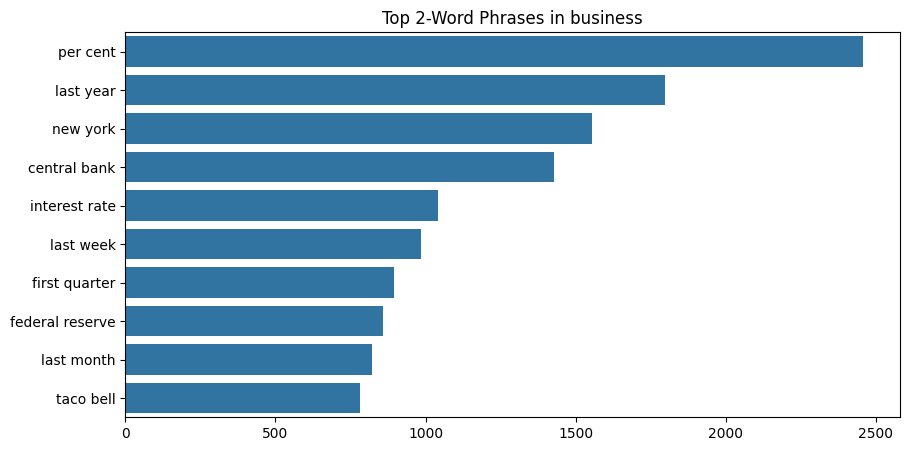

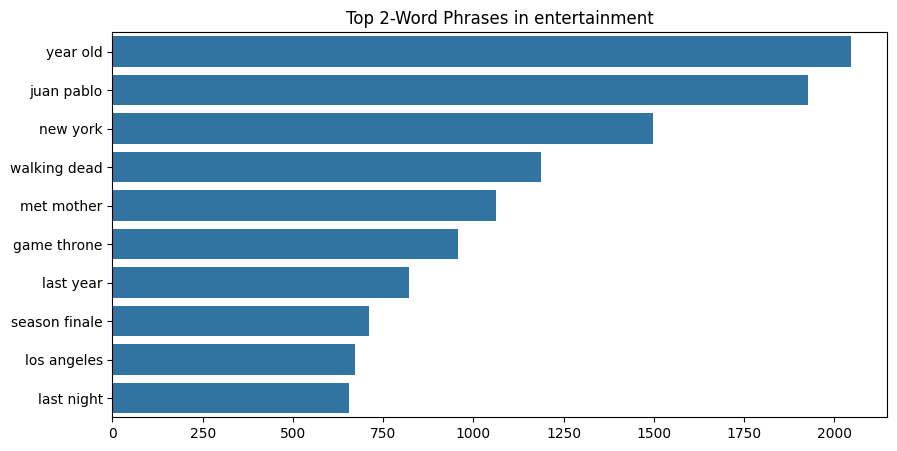

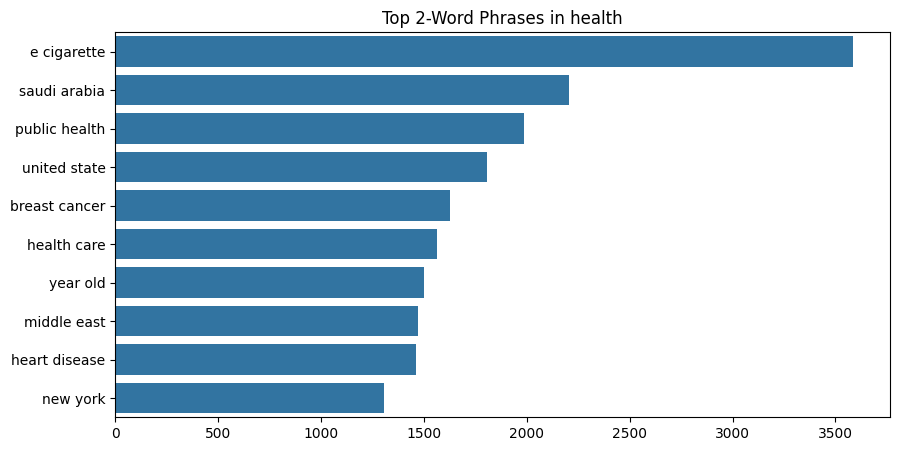

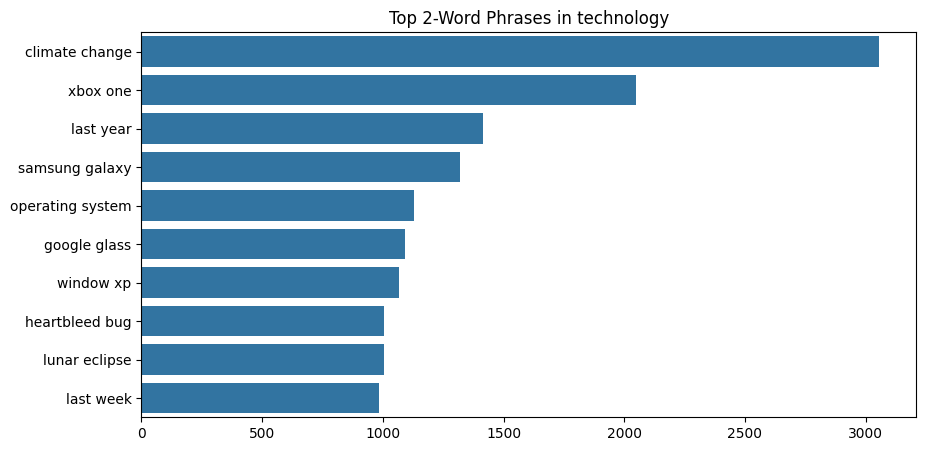

In [22]:

def plot_top_ngrams(df, category, n=2, top_k=10):
    text = ' '.join(df[df['CATEGORY'] == category]['PROCESSED_CONTENT'])
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)

    plt.figure(figsize=(10,5))
    sns.barplot(x=[count for _, count in freq_dist.most_common(top_k)],
                y=[' '.join(gram) for gram, _ in freq_dist.most_common(top_k)])
    plt.title(f'Top {n}-Word Phrases in {category}')
    plt.show()

# Example usage:
for category in processed_df['CATEGORY'].unique():
    plot_top_ngrams(processed_df, category, n=2)  # Bigrams

**Visualizing the top 15 Shared Words Across All Categories**

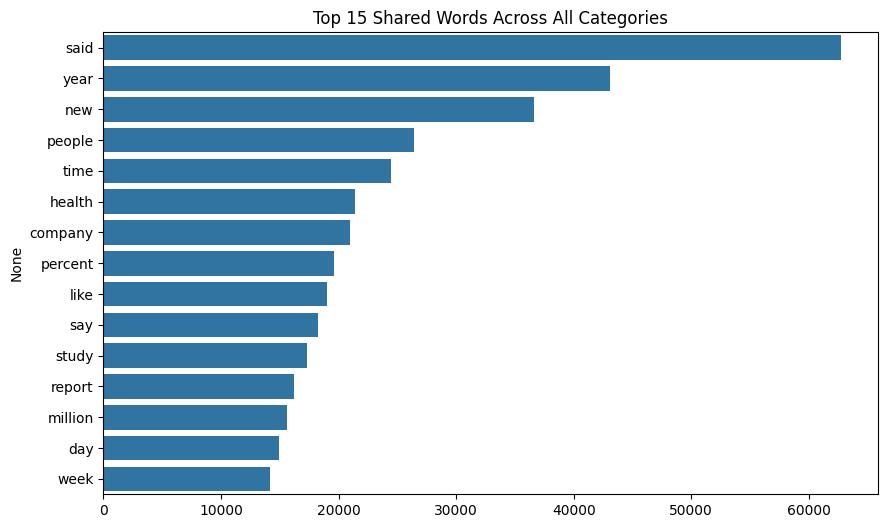

In [24]:
def plot_shared_words(df, top_k=15):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df.groupby('CATEGORY')['PROCESSED_CONTENT'].agg(' '.join))
    common_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().nlargest(top_k)

    plt.figure(figsize=(10,6))
    sns.barplot(x=common_words.values, y=common_words.index)
    plt.title(f'Top {top_k} Shared Words Across All Categories')
    plt.show()

plot_shared_words(processed_df)